In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sb
import anndata as ad
import pandas as pd

In [6]:
df3  = pd.read_csv("I:\\mutiomics\\ICC\\BQ-SXT20240702-空代50um-1-沈晓天-检测分析交付\\03\\03.csv")
last_column = df3.iloc[:, -1]
df3 = df3.drop(df3.columns[-1], axis=1)
df3_loc = last_column.str.split(',', expand=True)
df3_loc.index = df3_loc.index.astype(str)
df3_loc = df3_loc.to_numpy(dtype=int)

df4  = pd.read_csv("I:\\mutiomics\\ICC\\BQ-SXT20240702-空代50um-1-沈晓天-检测分析交付\\04\\04.csv")
last_column = df4.iloc[:, -1]
df4 = df4.drop(df4.columns[-1], axis=1)
df4_loc = last_column.str.split(',', expand=True)
df4_loc.index = df4_loc.index.astype(str)
df4_loc = df4_loc.to_numpy(dtype=int)

In [11]:
columns_equal = df3.columns.equals(df4.columns)

# 输出结果
if columns_equal:
    print("df3 和 df4 的列名是一样的。")
else:
    print("df3 和 df4 的列名不一样。")

df3 和 df4 的列名是一样的。


In [13]:
df3_trimmed = df3.iloc[:, 1:]
df4_trimmed = df4.iloc[:, 1:]

# 水平合并
df_combined = pd.concat([df3_trimmed, df4_trimmed], axis=0)

# 显示合并后的 DataFrame
print(df_combined)

       122.0002   122.9844   124.0066   125.0092   126.0023   127.0509  \
0      0.000000   7.490099  227.73466   0.000000  22.291960  14.623526   
1      0.000000  17.411709  268.60986   0.000000  19.368082   7.042939   
2      0.000000  13.963871  275.13190   0.000000   0.000000  31.200525   
3      0.000000   8.802348  321.28570   0.000000  30.042797   0.000000   
4      0.000000   0.000000  264.10046   0.000000  24.060802   0.000000   
...         ...        ...        ...        ...        ...        ...   
15034  0.000000  31.278984  589.18976  20.648218  39.865370   4.702069   
15035  8.955638  36.220577  562.61304  28.857054  40.996918   0.000000   
15036  0.000000  32.207634  732.62427  43.142326   0.000000   6.560814   
15037  6.854682  26.007470  596.96216   0.000000  45.563473  14.314189   
15038  0.000000   0.000000  511.09433   0.000000  42.389340   0.000000   

        128.0342   134.0463   134.9845   135.0301  ...  1192.7112  1193.7284  \
0       0.000000  25.858673  14

In [205]:
adata = ad.AnnData(df_combined)

I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [206]:
adata

AnnData object with n_obs × n_vars = 34665 × 2635

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA


I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\preprocessing\_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    with n_comps=50
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:31)
running Leiden clustering
    finished: found 9 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:20)
-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                         10.3.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
certifi                     2024.02.02
cffi                        1.16.0
charset_normalizer          3.3.2
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython_

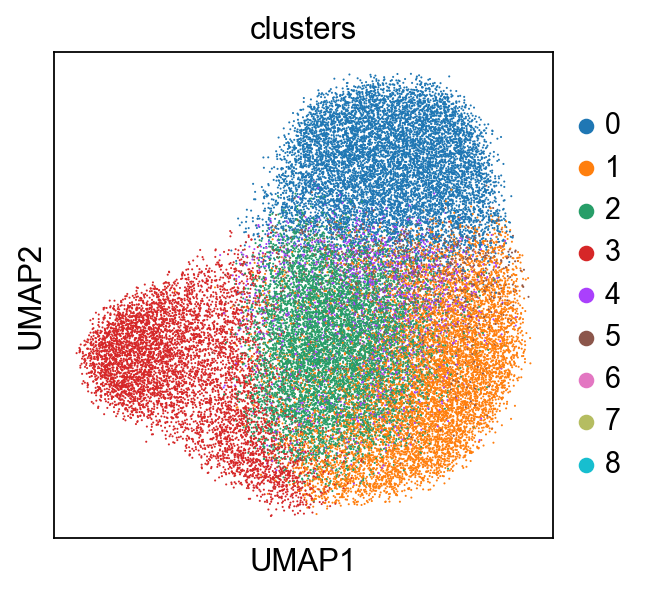

In [207]:
#sc.pp.normalize_total(adata, inplace = True,exclude_highly_expressed=False)
#sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=300, inplace=True)
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata,n_neighbors=20)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added='clusters')
plt.rcParams['figure.figsize']=(8,8)
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)
sc.pl.umap(adata, color='clusters', palette=sc.pl.palettes.default_20)

In [208]:
num_ko = df3.shape[0]
num_wt = df4.shape[0]

# 生成 batch 列的内容
batch_column = ['KO'] * num_ko + ['WT'] * num_wt

# 确保 adata.obs 的行数与 batch_column 的长度一致
if len(adata.obs) == len(batch_column):
    # 添加 batch 列到 adata.obs
    adata.obs['batch'] = batch_column
else:
    print("Error: adata.obs 的行数与生成的 batch 列长度不一致")

# 显示 adata.obs 的前几行，确认添加结果
print(adata.obs.head())

  clusters batch
0        3    KO
1        3    KO
2        3    KO
3        3    KO
4        3    KO


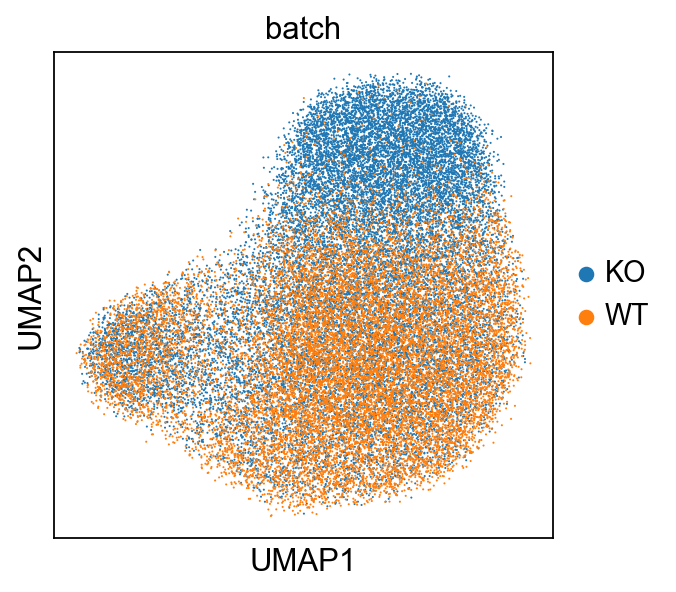

In [209]:
sc.pl.umap(adata, color='batch', palette=sc.pl.palettes.default_20)

In [210]:
pd.DataFrame(df3_loc.values, columns=['x', 'y'])

,x,y
0,26,1
1,27,1
2,28,1
3,29,1
4,30,1
...,...,...
19621,57,191
19622,58,191
19623,59,191
19624,60,191


In [211]:
adata3 = ad.AnnData(df3_trimmed)
df3_loc.index = df3_loc.index.astype(str)
adata3.obsm['spatial'] = df3_loc.to_numpy(dtype=int)
adata3.obs=adata.obs.iloc[0:num_ko,:]

adata4 = ad.AnnData(df4_trimmed)
df4_loc.index = df4_loc.index.astype(str)
adata4.obsm['spatial'] = df4_loc.to_numpy(dtype=int)
adata4.obs=adata.obs.iloc[num_ko:,:]


I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [212]:
adata3.obsm['spatial']

array([[ 26,   1],
       [ 27,   1],
       [ 28,   1],
       ...,
       [ 59, 191],
       [ 60, 191],
       [ 61, 191]])

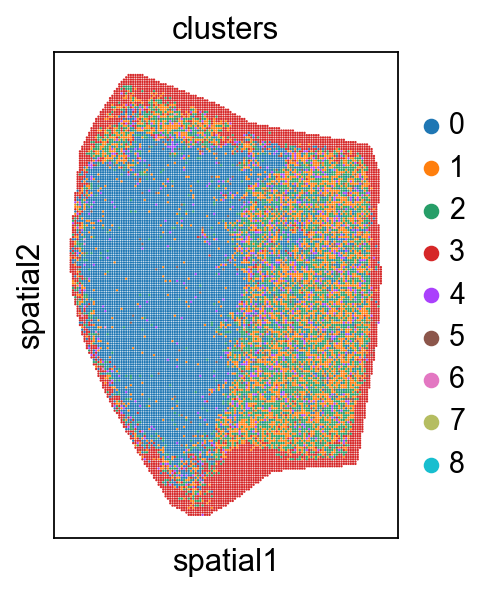

In [213]:
sc.pl.spatial(adata3, img_key = "hires", color="clusters", spot_size=1)

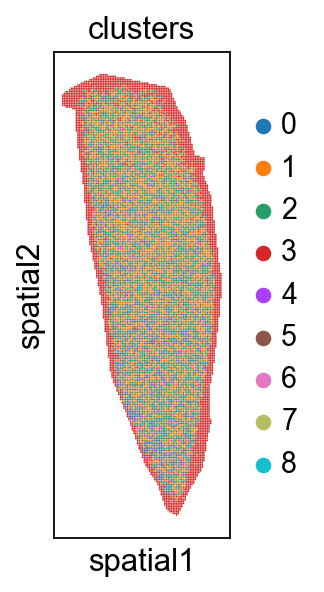

In [214]:
sc.pl.spatial(adata4, img_key = "hires", color="clusters", spot_size=1)

In [180]:
adata.write("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\msi\\ITO3\\ITO3_C1\\output_data\\ITO3mPD4ITO.h5ad")

I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
